## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-11-14 18:37:23.032163: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-14 18:37:23.962912: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-14 18:37:24.435794: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-14 18:37:24.436614: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instruc

In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run)
importlib.reload(models.train_val)
importlib.reload(data.data_utils)
importlib.reload(data.data_load)


Resorting genes by reference genome order
Resorting genes by reference genome order


<module 'data.data_load' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/data/data_load.py'>

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 10.9%
RAM Usage: 8.8%
Available RAM: 1.3T
Total RAM: 1.5T
52.4G


In [5]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB


In [6]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [7]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

In [8]:
torch._dynamo.reset()

Resorting genes by reference genome order
Resorting genes by reference genome order
Number of components for 95% variance PCA: 54
Resorting genes by reference genome order
valid_indices 183
X shape: (179, 7380)
X_pca shape: (179, 54)
X_pca_full shape: (179, 179)
Y_sc shape: (179, 179)
Y_sc_spectralL shape: (179, 183)
Y_sc_spectralA shape: (179, 183)
Y_fc shape: (179, 179)
Coordinates shape: (179, 3)
connectome target FC
Y shape (179, 179)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


  return LooseVersion(v) >= LooseVersion(check)

ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: t7m89g56
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/t7m89g56
Initialized sweep with ID: t7m89g56
2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'batch_size': 512, 'aug_prob': 0.3, 'aug_style': 'curriculum_swap_linear_decay', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}


  warnings.warn(



Number of learnable parameters in SMT model: 2162315
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.01 GB
Best val loss so far at epoch 1: 0.2753
Best val loss so far at epoch 2: 0.2376
Best val loss so far at epoch 3: 0.0600
Epoch 5/110, Train Loss: 0.2167, Val Loss: 0.0870, Time: 1.25s
Best val loss so far at epoch 6: 0.0412
Epoch 10/110, Train Loss: 0.1388, Val Loss: 0.0619, Time: 1.26s
Epoch 15/110, Train Loss: 0.1112, Val Loss: 0.0469, Time: 1.30s
Best val loss so far at epoch 17: 0.0403
Best val loss so far at epoch 19: 0.0373
Best val loss so far at epoch 20: 0.0364
Epoch 20/110, Train Loss: 0.0767, Val Loss: 0.0364, Time: 1.28s
Best val loss so far at epoch 21: 0.0326
Best val loss so far at epoch 23: 0.0307
Best val loss so far at epoch 25: 0.0303
Epoch 25/110, Train Loss: 0.0649, Val Loss: 0.0303, Time: 1.24s
Best val loss so far at epoch 26: 0.0283
Best val loss so far at epoch 29: 0.0270
Epoch 30/110, Train Loss: 0.0637, Val Loss: 0.0274, Time: 1.32s


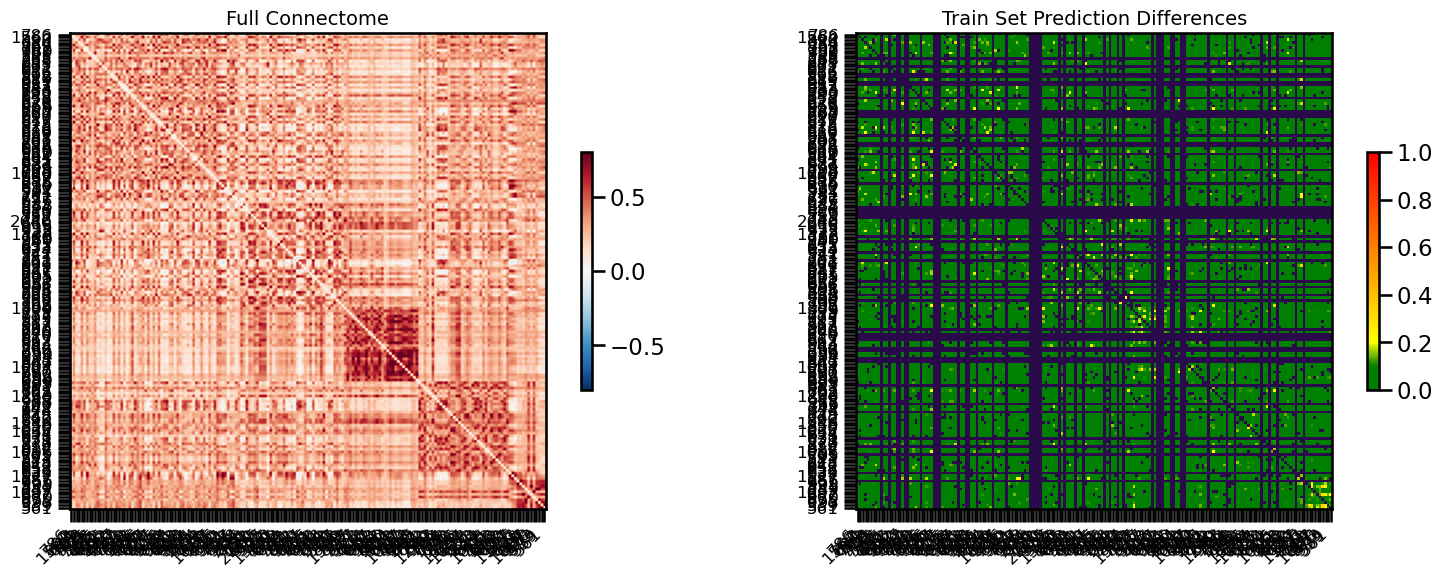

<Figure size 640x480 with 0 Axes>

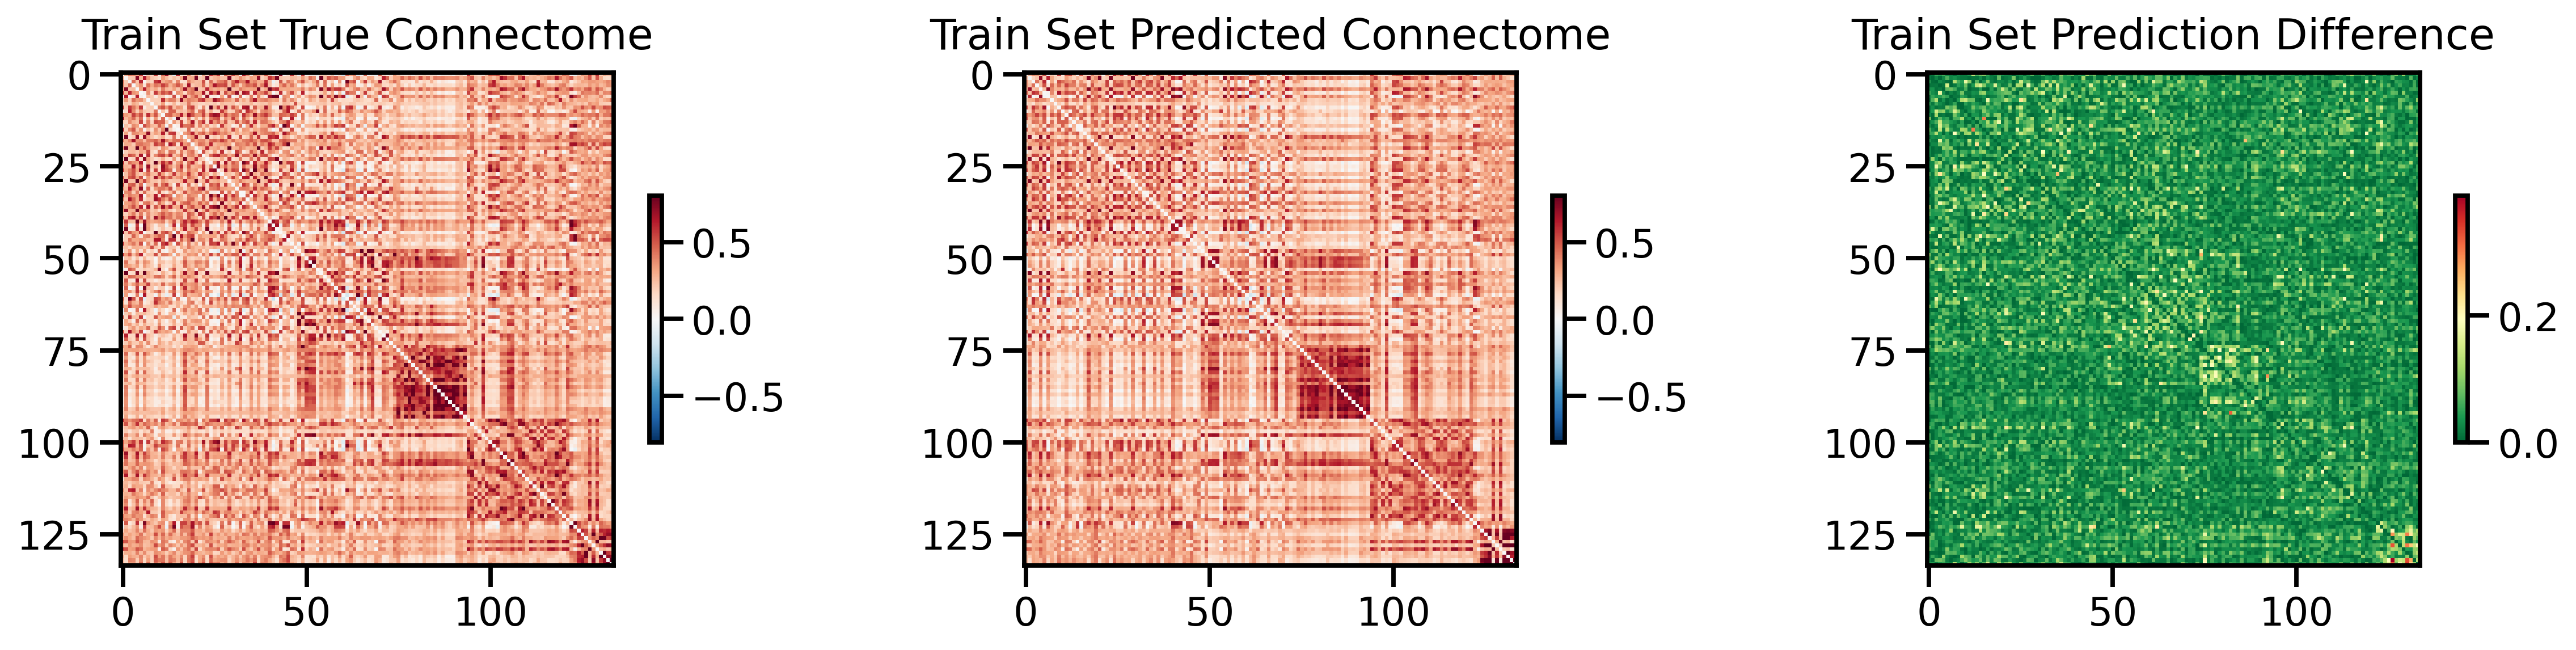

<Figure size 640x480 with 0 Axes>

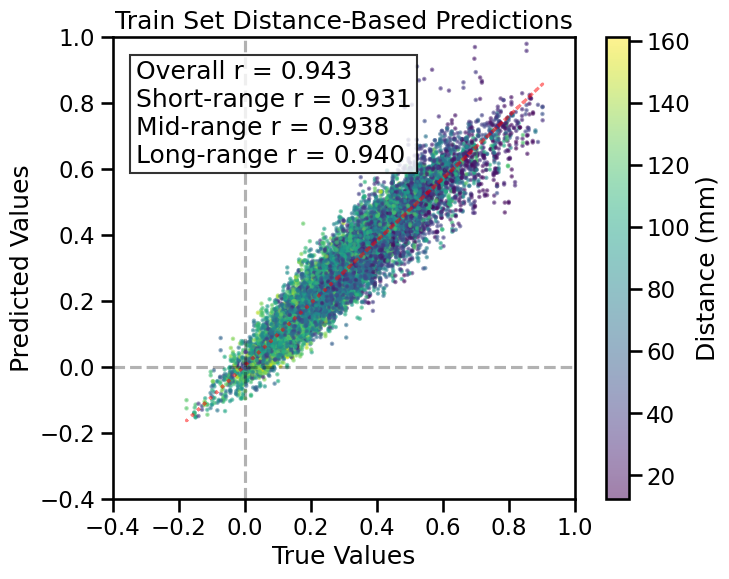

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 45 regions, 1980 connections


<Figure size 640x480 with 0 Axes>

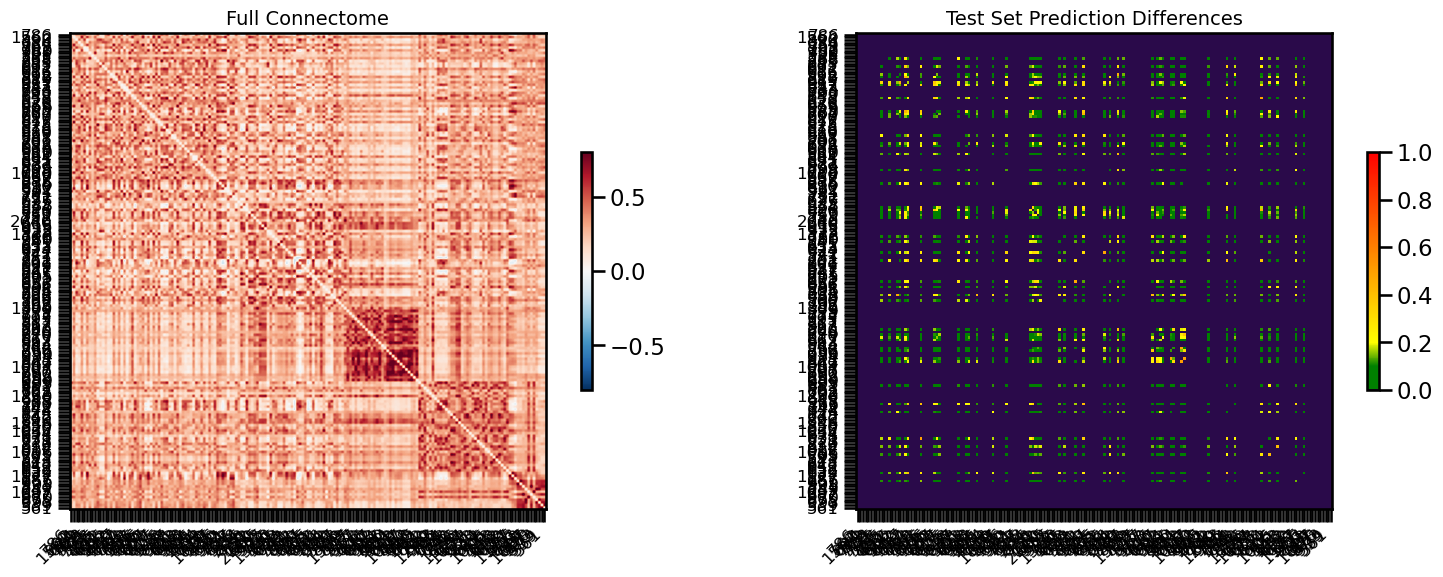

<Figure size 640x480 with 0 Axes>

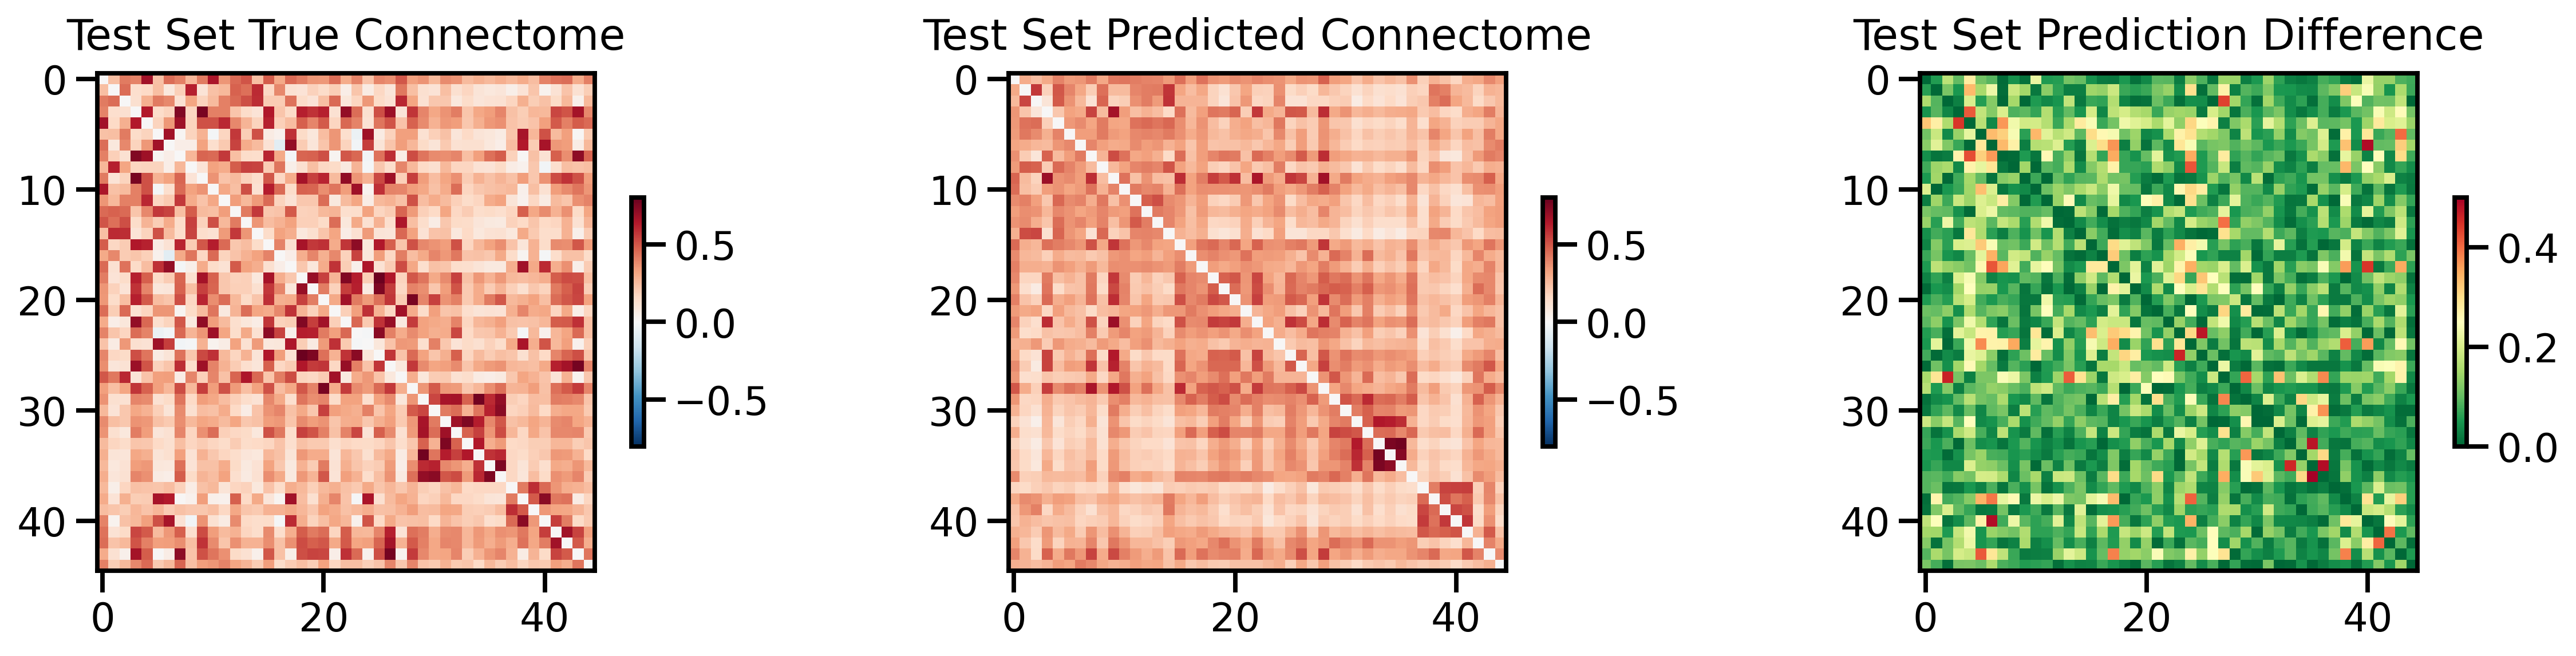

<Figure size 640x480 with 0 Axes>

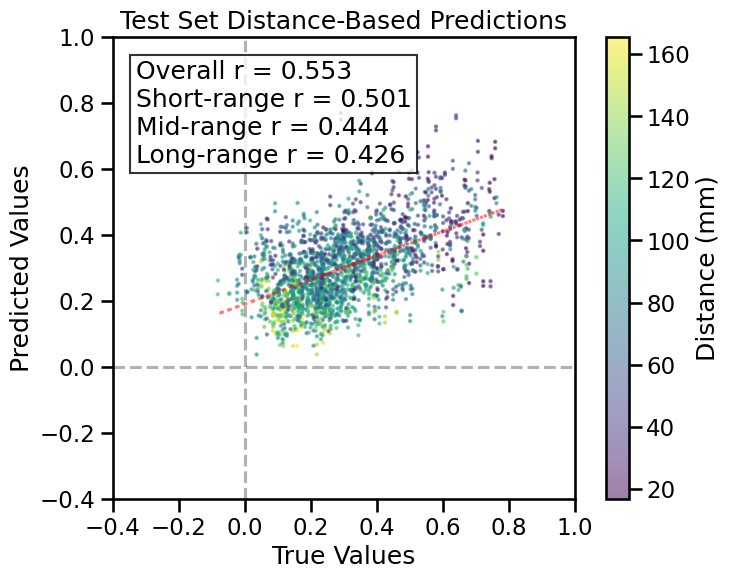

TRAIN METRICS
GLOBAL: mse=0.003133, mae=0.042737, r2=0.8800, pearson_r=0.9430, spearman_r=0.9422, geodesic_distance=8.2773
DISTANCE-BASED: short=0.9315, mid=0.9383, long=0.9402
HEMISPHERIC: left=0.9396, right=0.9477, inter=0.9470
CONNECTION STRENGTH: weak=0.8666, pos=0.8635

TEST METRICS
GLOBAL: mse=0.019971, mae=0.108995, r2=0.2934, pearson_r=0.5528, spearman_r=0.5266, geodesic_distance=5.0755
DISTANCE-BASED: short=0.5013, mid=0.4444, long=0.4258
HEMISPHERIC: left=0.5640, right=0.5051, inter=0.5601
CONNECTION STRENGTH: weak=0.1220, pos=0.4343

BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'input_dim': 7380, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'use_alibi': True, 'batch_size': 512, 'aug_prob': 0.3, 'aug_style': 'curriculum_swap_linear_decay', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}
CPU Usage: 4.9%
RAM Usage: 4.8%
Available RAM: 1.4T
Total RAM: 1.5T
| ID | GPU | MEM |
------------

12005

<Figure size 640x480 with 0 Axes>

In [9]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              omit_subcortical=False,
              parcellation='iPA_183',
              hemisphere='both',
              dataset='BHA2',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='shared_transformer',
              use_gpu=True,
              null_model='none',
              use_folds=[0])

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()